In [1]:
import astropy.coordinates as coord
from astropy.io import ascii
import astropy.table as at
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from gary.observation.rrlyrae import M_V
from gary.observation import distance

In [2]:
# this contains all Catalina RR Lyrae stars
tbl = ascii.read("/Users/adrian/projects/streams/data/catalog/Catalina_all_RRLyr.txt")
tbl.remove_column("Num")

# this contains Catalina RR Lyrae with measured radial velocities
rvtbl = ascii.read("/Users/adrian/projects/streams/data/catalog/Catalina_vgsr_RRLyr.txt")
rvtbl = rvtbl.filled(np.nan)
rvtbl = rvtbl[~np.isnan(rvtbl['Vgsr'])]

In [3]:
tbl.colnames

['ID', 'RAdeg', 'DEdeg', '<Vmag>', 'Period', 'A', 'dh', 'AV', 'Eta', 'AID']

In [5]:
rvtbl.colnames

['ID', 'u0mag', 'g0mag', 'r0mag', 'i0mag', 'z0mag', 'Vgsr', '[Fe/H]']

In [6]:
# join the RV star table with the normal table to get positions for stars with RV's
joined = at.join(tbl, rvtbl, keys=("ID"))

In [7]:
# j = joined
c = coord.SkyCoord(ra=tbl['RAdeg'].data*u.deg, dec=tbl['DEdeg'].data*u.deg)
cj = coord.SkyCoord(ra=joined['RAdeg'].data*u.deg, dec=joined['DEdeg'].data*u.deg)

gal = c.galactic
galj = cj.galactic

In [8]:
box = [100,160,-35,-15]*u.degree

ix = ((c.galactic.l > box[0]) & (c.galactic.l < box[1]) & 
      (c.galactic.b > box[2]) & (c.galactic.b < box[3]))
triand = tbl[ix].filled()
_c_triand = c[ix]

ix = ((cj.galactic.l > box[0]) & (cj.galactic.l < box[1]) & 
      (cj.galactic.b > box[2]) & (cj.galactic.b < box[3]))
triandj = joined[ix].filled()
_c_triandj = cj[ix]

In [9]:
print("{} RR Lyrae stars in this region -- {} has a measured radial velocity.".format(len(triand), len(triandj)))

340 RR Lyrae stars in this region -- 1 has a measured radial velocity.


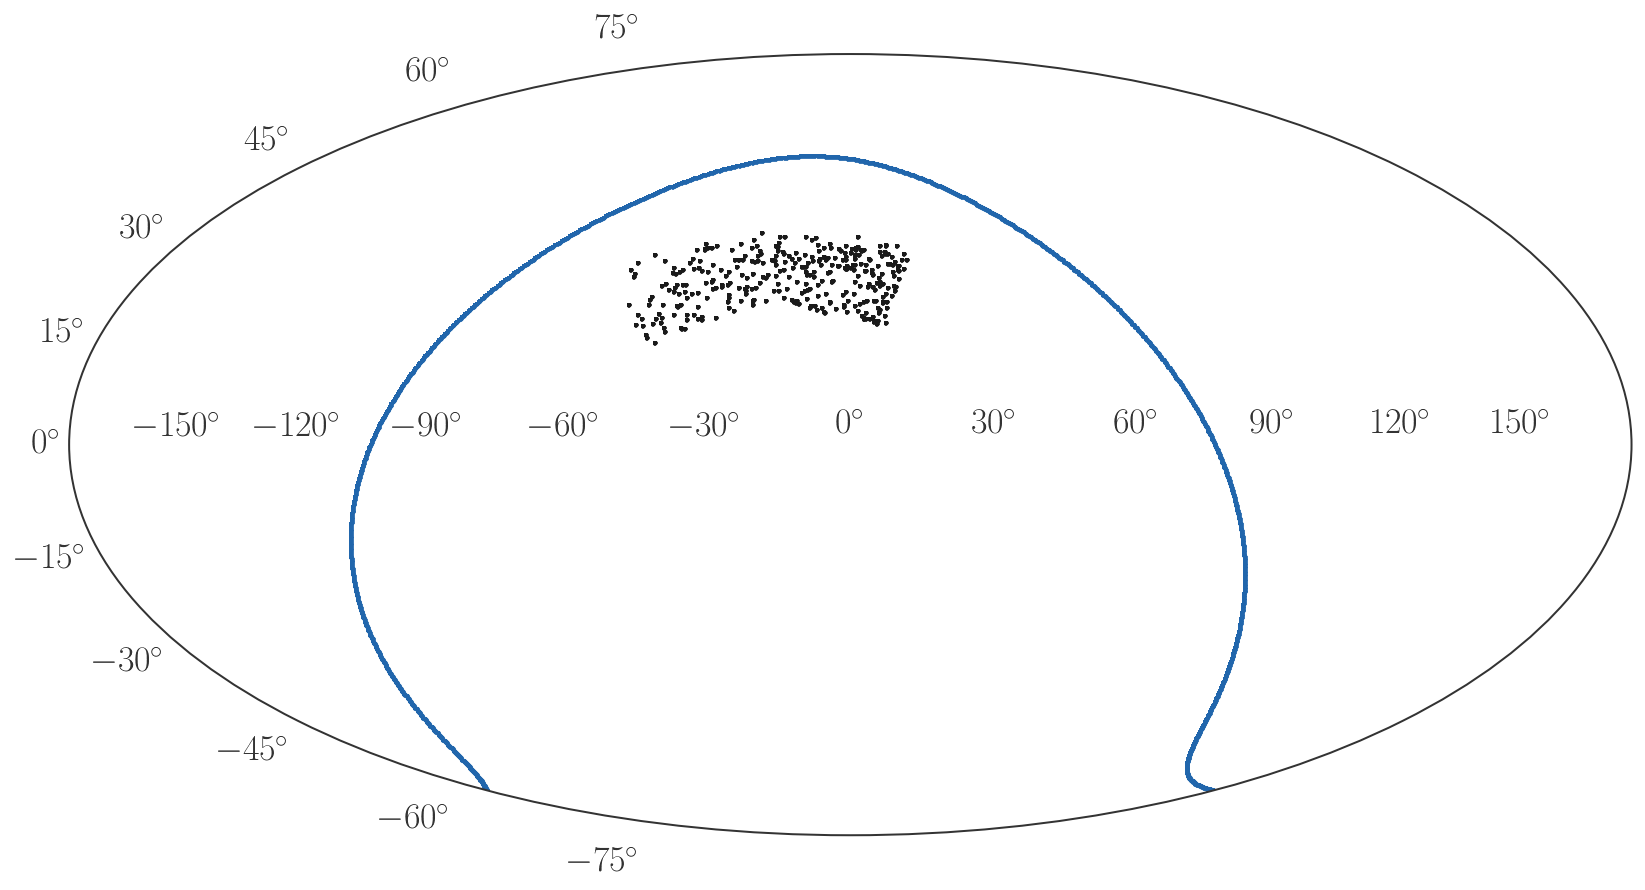

In [10]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='hammer')
ax.plot((coord.Angle(360*u.deg) - _c_triand.icrs.ra).wrap_at(180*u.deg).radian, 
        _c_triand.icrs.dec.radian, linestyle='none')

gplane = coord.SkyCoord(l=np.linspace(0,360,1000)*u.deg, b=np.zeros(1000)*u.deg, frame=coord.Galactic)

ax.plot((coord.Angle(360*u.deg) - gplane.icrs.ra).wrap_at(180*u.deg).radian, 
        gplane.icrs.dec.radian, linestyle='none')

#### Now a distance cut:

In [21]:
d = triand['dh'].data
d_cut = (d > 15) & (d < 21)

triand_dist = triand[d_cut]
c_triand = _c_triand[d_cut]
print(len(triand_dist))

77


(array([  6.,  14.,  17.,  12.,  13.,  11.,   3.,   0.,   0.,   1.]),
 array([ 16.63 ,  16.773,  16.916,  17.059,  17.202,  17.345,  17.488,
         17.631,  17.774,  17.917,  18.06 ]),
 <a list of 10 Patch objects>)

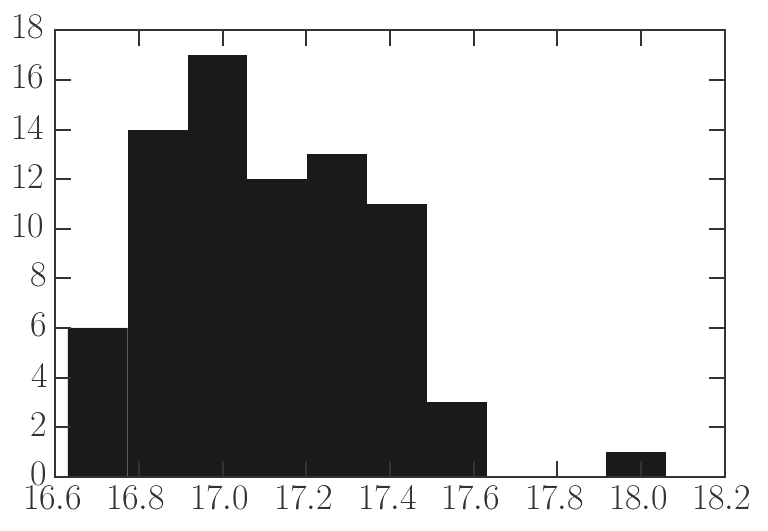

In [22]:
plt.hist(triand_dist['<Vmag>'].data)

#### Stars I actually observed

In [30]:
ptf_triand = ascii.read("/Users/adrian/projects/streams/data/observing/triand.txt")
ptf_c = coord.SkyCoord(ra=ptf_triand['ra']*u.deg, dec=ptf_triand['dec']*u.deg)

print ptf_triand.colnames, len(ptf_triand)
obs_dist = distance(ptf_triand['Vmag'].data)
((obs_dist > 12*u.kpc) & (obs_dist < 25*u.kpc)).sum()

['name', 'ra', 'dec', 'period', 'hjd0', 'amp', 'mag0', 'template', 'rExt', 'Vmag'] 34


12

In [31]:
ptf_triand[0]

<Row 0 of table
 values=('TriAndRRL1', 35.804598, 31.551122, 0.6297892, 55889.67436, 0.724, 17.902, 112, 0.181, 18.131)
 dtype=[('name', 'S11'), ('ra', '<f8'), ('dec', '<f8'), ('period', '<f8'), ('hjd0', '<f8'), ('amp', '<f8'), ('mag0', '<f8'), ('template', '<i8'), ('rExt', '<f8'), ('Vmag', '<f8')]>

#### Data for the observed stars

In [34]:
rrlyr_d = np.genfromtxt("/Users/adrian/projects/triand-rrlyrae/data/RRL_ALL.txt", 
                        skiprows=2, dtype=None, names=['l','b','vhel','vgsr','src','ra','dec','name','dist'])
obs_rrlyr = rrlyr_d[rrlyr_d['src'] == 'PTF']

### Comparison of stars observed with Catalina

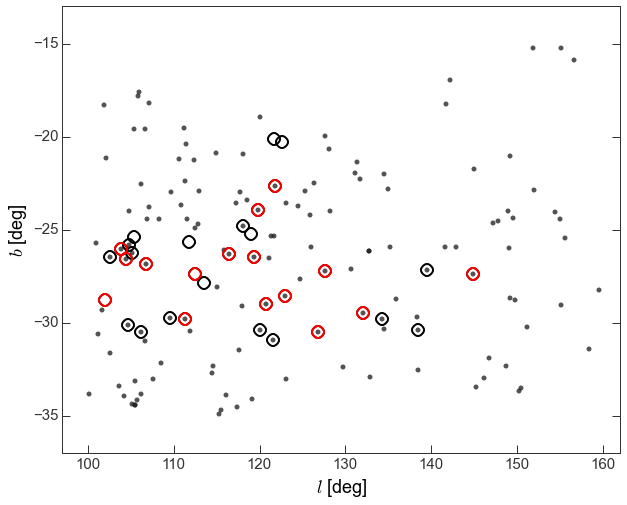

In [35]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
# ax.plot(c.galactic.l.degree, c.galactic.b.degree, linestyle='none',
#         marker='o', markersize=4, alpha=0.75) # ALL RR LYRAE
ax.plot(c_triand.galactic.l.degree, c_triand.galactic.b.degree, linestyle='none',
        marker='o', markersize=5, alpha=0.75)
ax.plot(ptf_c.galactic.l.degree, ptf_c.galactic.b.degree, linestyle='none', 
        marker='o', markerfacecolor='none', markeredgewidth=2, markersize=12, alpha=0.75)
ax.plot(obs_rrlyr['l'], obs_rrlyr['b'], linestyle='none', mec='r',
        marker='o', markerfacecolor='none', markeredgewidth=2, markersize=12, alpha=0.75)

# x = np.linspace(-10,40,100)
# x[x < 0] += 360.
# y = np.linspace(30,45,100)
# x,y = map(np.ravel, np.meshgrid(x,y))
# ccc = coord.SkyCoord(ra=x*u.deg,dec=y*u.deg)
# ax.plot(ccc.galactic.l.degree, ccc.galactic.b.degree, linestyle='none')

ax.set_xlim(97,162)
ax.set_ylim(-37,-13)

ax.set_xlabel("$l$ [deg]")
ax.set_ylabel("$b$ [deg]")

# Issues

Why are some of the PTF RR Lyrae missing from Catalina? Because they are too faint! (R>18)
Why are Catalina stars missing from PTF? More observations, larger selection window.

(-37, -13)

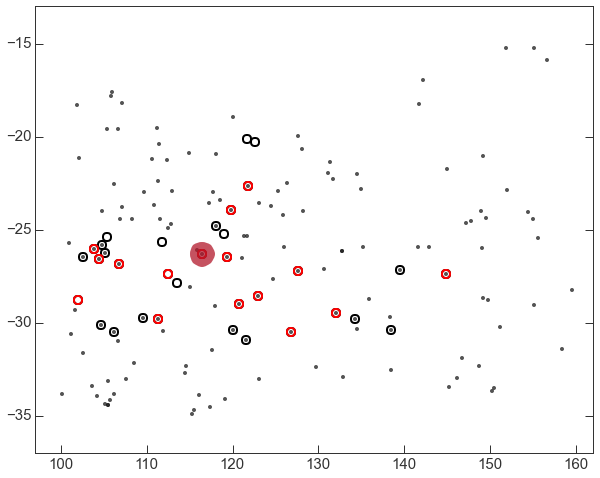

In [36]:
fig,ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(c_triand.galactic.l.degree, c_triand.galactic.b.degree, linestyle='none',
        marker='o', markersize=4, alpha=0.75)
ax.plot(ptf_c.galactic.l.degree, ptf_c.galactic.b.degree, linestyle='none', 
        marker='o', markerfacecolor='none', markeredgewidth=2, markersize=8, alpha=0.75)
ax.plot(obs_rrlyr['l'], obs_rrlyr['b'], linestyle='none', mec='r',
        marker='o', markerfacecolor='none', markeredgewidth=2, markersize=8, alpha=0.75)

ax.plot(c_triand.galactic.l.degree[10], c_triand.galactic.b.degree[10], linestyle='none',
        marker='o', markersize=25, alpha=0.75)

ax.set_xlim(97,162)
ax.set_ylim(-37,-13)

In [37]:
c_triand.icrs[10]

<SkyCoord (ICRS): (ra, dec) in deg
    (5.57656, 36.20331)>

Possible Blaschko stars:
* R_13322281016459551106
* R_13879390364114107826

In [38]:
brani = ascii.read("/Users/adrian/projects/triand-rrlyrae/brani_sample/TriAnd.dat")

ERROR: IOError: [Errno 2] No such file or directory: '/Users/adrian/projects/triand-rrlyrae/brani_sample/TriAnd.dat' [astropy.utils.data]


IOError: [Errno 2] No such file or directory: '/Users/adrian/projects/triand-rrlyrae/brani_sample/TriAnd.dat'

In [37]:
blaschko = brani[(brani['objectID'] == "13322281016459551106") | (brani['objectID'] == "13879390364114107826")]

In [43]:
for b in blaschko:
    row = ptf_triand[np.argmin(np.sqrt((ptf_triand['ra'] - b['ra'])**2 + (ptf_triand['dec'] - b['dec'])**2))]
    print(row['name'])
    print(coord.SkyCoord(ra=row['ra']*u.deg, dec=row['dec']*u.deg).galactic)

TriAndRRl9
<SkyCoord (Galactic): l=121.799330468 deg, b=-22.6604581914 deg>
TriAndRRl25
<SkyCoord (Galactic): l=105.146732676 deg, b=-26.2487476161 deg>


In [44]:
zip(obs_rrlyr['l'], obs_rrlyr['b'])

[(139.54900000000001, -27.195),
 (121.79900000000001, -22.66),
 (120.687, -28.995999999999999),
 (101.973, -28.800999999999998),
 (116.38, -26.297999999999998),
 (104.45699999999999, -26.559000000000001),
 (106.765, -26.870000000000001),
 (111.364, -29.786000000000001),
 (144.90199999999999, -27.375),
 (127.63200000000001, -27.218),
 (103.828, -26.050000000000001),
 (112.504, -27.390999999999998),
 (119.304, -26.454000000000001),
 (119.866, -23.962),
 (122.959, -28.591000000000001),
 (126.842, -30.515999999999998),
 (132.07499999999999, -29.477)]

In [72]:
d = V_to_dist(triand['<Vmag>'].data).to(u.kpc).value

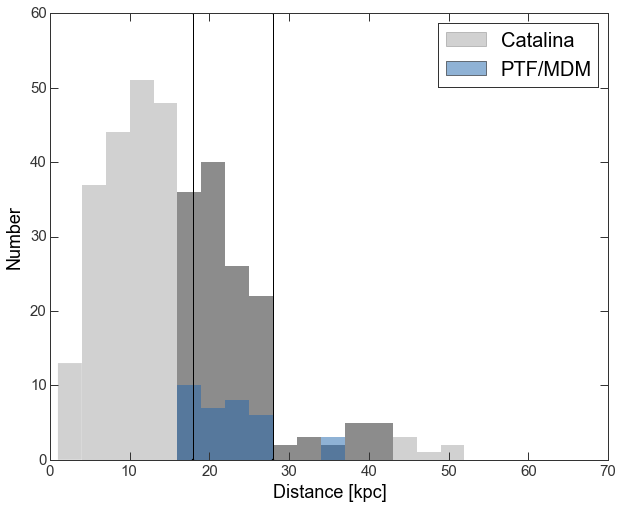

In [126]:
bins = np.arange(1., 60+5, 3)

plt.figure(figsize=(10,8))
n,bins,patches = plt.hist(triand['dh'].data, bins=bins, alpha=0.5, label='Catalina')
for pa in patches:
    if pa.xy[0] < 15. or pa.xy[0] > 40.:
        pa.set_alpha(0.2)

# other_bins = np.arange(0, 15+2., 2.)
# plt.hist(V_to_dist(triand['<Vmag>'].data), bins=other_bins, alpha=0.2, color='k')

# other_bins = np.arange(40, 60., 2.)
# plt.hist(V_to_dist(triand['<Vmag>'].data), bins=other_bins, alpha=0.2, color='k')

plt.hist(V_to_dist(ptf_triand['Vmag'].data), 
         bins=bins, alpha=0.5, label='PTF/MDM')
plt.xlabel("Distance [kpc]")
plt.ylabel("Number")
# plt.ylim(0,35)
plt.legend(fontsize=20)
plt.axvline(18.)
plt.axvline(28.)

# For Kathryn's proposal

In [39]:
import emcee
import triangle
from scipy.misc import logsumexp

In [42]:
((distance(triand['<Vmag>'].data) > (15.*u.kpc)) & (distance(triand['<Vmag>'].data) < (40.*u.kpc))).sum()

210

In [43]:
!head -n3 /Users/adrian/projects/triand-rrlyrae/data/triand_giants.txt

l b vr ra dec
135.58 -21.57 155.2 28.2259822912 39.7872859424
101.82 -15.72 176.1 344.805232178 42.5048864737


In [44]:
d = np.loadtxt("/Users/adrian/projects/triand-rrlyrae/data/triand_giants.txt", skiprows=1)
d2 = np.genfromtxt("/Users/adrian/projects/triand-rrlyrae/data/TriAnd_Mgiant.txt", skiprows=2)

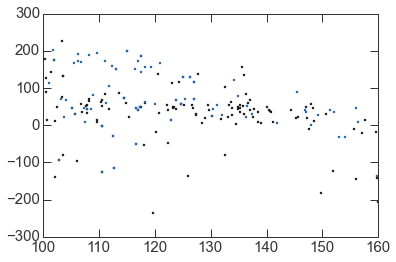

In [45]:
plt.plot(d[:,0], d[:,2], linestyle='none')
plt.plot(d2[:,0], d2[:,3], linestyle='none')

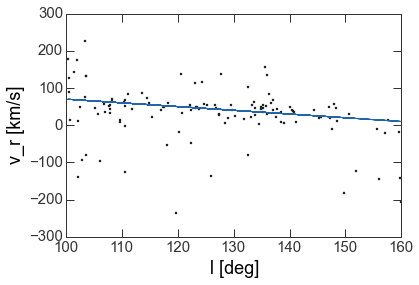

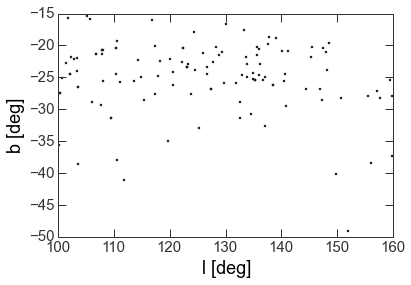

In [46]:
ix = (d[:,2] < 100) & (d[:,2] > -50)
ix = np.ones_like(ix).astype(bool)
plt.plot(d[ix,0], d[ix,2], linestyle='none')
plt.plot(d[ix,0], -1*d[ix,0] + 170, marker=None)
plt.xlabel('l [deg]')
plt.ylabel('v_r [km/s]')

plt.figure()
plt.plot(d[ix,0], d[ix,1], linestyle='none')
plt.xlabel('l [deg]')
plt.ylabel('b [deg]')

In [47]:
def ln_normal(x, mu, sigma):
    return -0.5*np.log(2*np.pi) - np.log(sigma) - 0.5*((x-mu)/sigma)**2

# def ln_prior(p):
#     m,b,V = p
    
#     if m > 0. or m < -50:
#         return -np.inf
    
#     if b < 0 or b > 500:
#         return -np.inf
    
#     if V <= 0.:
#         return -np.inf
    
#     return -np.log(V)

# def ln_likelihood(p, l, vr, sigma_vr):
#     m,b,V = p
#     sigma = np.sqrt(sigma_vr**2 + V**2)
#     return ln_normal(vr, m*l + b, sigma)

# mixture model - f_ol is outlier fraction
def ln_prior(p):
    m,b,V,f_ol = p
    
    if m > 0. or m < -50:
        return -np.inf
    
    if b < 0 or b > 500:
        return -np.inf
    
    if V <= 0.:
        return -np.inf
    
    if f_ol > 1. or f_ol < 0.:
        return -np.inf
    
    return -np.log(V)

def likelihood(p, l, vr, sigma_vr):
    m,b,V,f_ol = p
    sigma = np.sqrt(sigma_vr**2 + V**2)
    term1 = ln_normal(vr, m*l + b, sigma)
    term2 = ln_normal(vr, 0., 120.)
    return np.array([term1, term2])

def ln_likelihood(p, *args):
    m,b,V,f_ol = p
    x = likelihood(p, *args)
    
    # coefficients
    b = np.zeros_like(x)
    b[0] = 1-f_ol
    b[1] = f_ol
    
    return logsumexp(x,b=b, axis=0)
    
def ln_posterior(p, *args):
    lnp = ln_prior(p)
    if np.isinf(lnp):
        return -np.inf
    
    return lnp + ln_likelihood(p, *args).sum()

def outlier_prob(p, *args):
    m,b,V,f_ol = p
    p1,p2 = likelihood(p, *args)
    return f_ol*np.exp(p2) / ((1-f_ol)*np.exp(p1) + f_ol*np.exp(p2))

In [48]:
vr_err = 2 # km/s
nwalkers = 32
sampler = emcee.EnsembleSampler(nwalkers=nwalkers, dim=4, lnpostfn=ln_posterior, 
                                args=(d[ix,0],d[ix,2],vr_err))

In [49]:
p0 = np.zeros((nwalkers,sampler.dim))
p0[:,0] = np.random.normal(-1, 0.1, size=nwalkers)
p0[:,1] = np.random.normal(150, 0.1, size=nwalkers)
p0[:,2] = np.random.normal(25, 0.5, size=nwalkers)
p0[:,3] = np.random.normal(0.1, 0.01, size=nwalkers)

for pp in p0:
    lnp = ln_posterior(pp, *sampler.args)
    if not np.isfinite(lnp):
        print("you suck")

In [50]:
pos,prob,state = sampler.run_mcmc(p0, N=100)
sampler.reset()
pos,prob,state = sampler.run_mcmc(pos, N=1000)

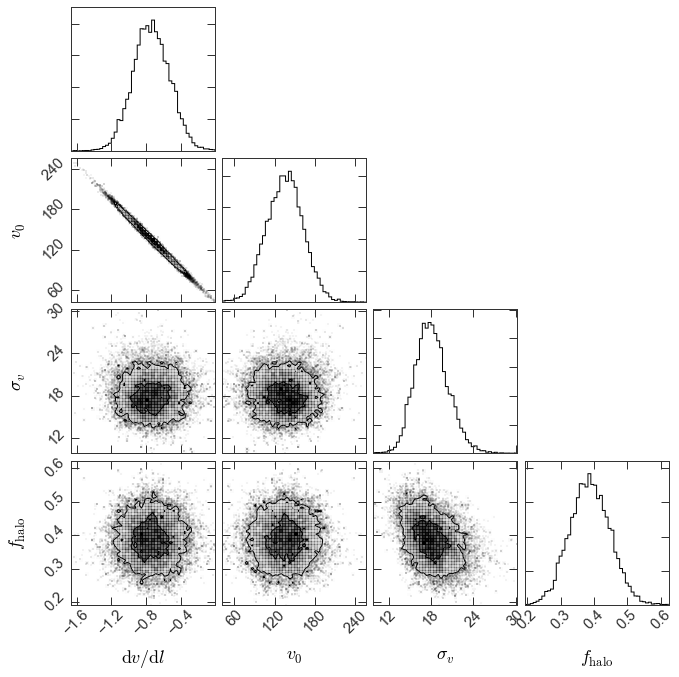

In [51]:
fig = triangle.corner(sampler.flatchain,
                      labels=[r'$\mathrm{d}v/\mathrm{d}l$', r'$v_0$', r'$\sigma_v$', r'$f_{\rm halo}$'])

In [52]:
figsize = (12,8)

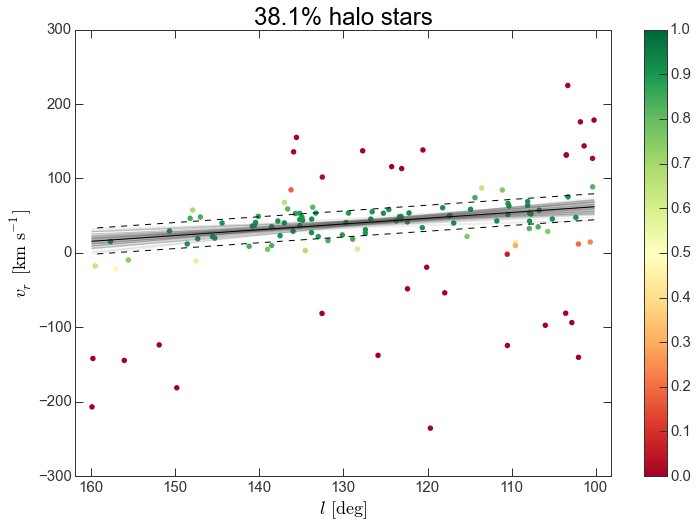

In [53]:
MAP = sampler.flatchain[sampler.flatlnprobability.argmax()]
pout = outlier_prob(MAP, d[ix,0], d[ix,2], vr_err)

plt.figure(figsize=figsize)
cl = plt.scatter(d[ix,0], d[ix,2], c=(1-pout), s=30, cmap='RdYlGn', vmin=0, vmax=1)
cbar = plt.colorbar(cl)
cbar.set_clim(0,1)

# plt.plot(d[ix,0], d[ix,2], linestyle='none', marker='o', ms=4)
plt.xlabel(r'$l\,[{\rm deg}]$')
plt.ylabel(r'$v_r\,[{\rm km\,s}^{-1}]$')

ls = np.linspace(d[ix,0].min(), d[ix,0].max(), 100)
for i in np.random.randint(len(sampler.flatchain), size=100):
    m,b,V,f_ol = sampler.flatchain[i]
    plt.plot(ls, m*ls+b, color='#555555', alpha=0.1, marker=None)

best_m,best_b,best_V,best_f_ol = MAP
plt.plot(ls, best_m*ls + best_b, color='k', alpha=1, marker=None)
plt.plot(ls, best_m*ls + best_b + best_V, color='k', alpha=1, marker=None, linestyle='--')
plt.plot(ls, best_m*ls + best_b - best_V, color='k', alpha=1, marker=None, linestyle='--')
plt.xlim(ls.max()+2, ls.min()-2)
plt.title("{:.1f}% halo stars".format(best_f_ol*100.))

In [58]:
print(((1-pout) > 0.75).tolist())

[False, False, False, False, False, False, True, True, True, True, True, False, True, True, False, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, False, True, True, True, True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, False, True, False, True, True, True, True, True, False, True, False, False, True, True, False, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, True, True, False, False, False, False, False, True, False, True, False, True, True, True, True, True, True, True, True, True, False]


In [59]:
print best_m, best_b, best_V

-0.776851028033 139.823102439 17.4792917207


In [51]:
print "MAP velocity dispersion: {:.2f} km/s".format(best_V)

MAP velocity dispersion: 17.06 km/s


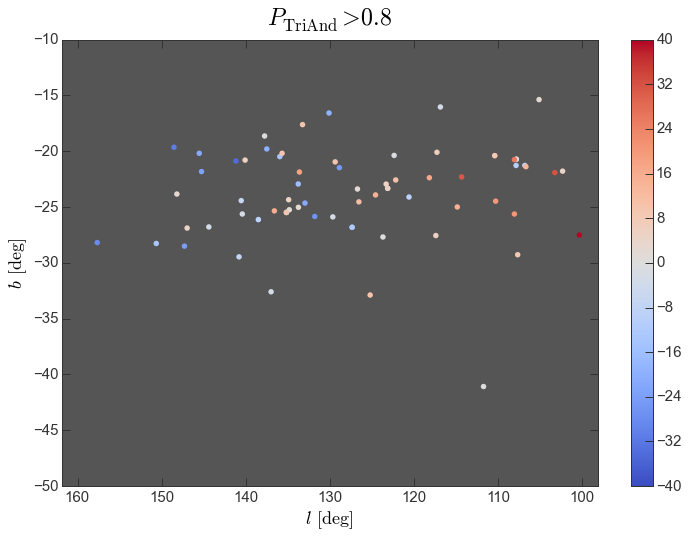

In [52]:
high_p = (1-pout) > 0.8

plt.figure(figsize=figsize)
cl = plt.scatter(d[high_p,0], d[high_p,1], c=d[high_p,2]-d[high_p,2].mean(), s=30, cmap='coolwarm', vmin=-40, vmax=40)
cbar = plt.colorbar(cl)
ax = plt.gca()
ax.set_axis_bgcolor('#555555')

plt.xlim(ls.max()+2,ls.min()-2)
plt.ylim(-50,-10)
plt.xlabel(r'$l\,[{\rm deg}]$')
plt.ylabel(r'$b\,[{\rm deg}]$')
plt.title(r'$P_{\rm TriAnd} > 0.8$', y=1.02)

### Now read in RR Lyrae data, compute prob for each star

In [117]:
rrlyr_d = np.genfromtxt("/Users/adrian/projects/triand-rrlyrae/data/RRL_ALL.txt", skiprows=2, dtype=None)

In [116]:
!cat "/Users/adrian/projects/triand-rrlyrae/data/RRL_ALL.txt"

In [57]:
rrlyr_d = np.genfromtxt("/Users/adrian/projects/triand-rrlyrae/data/RRL_ALL.txt", skiprows=2)
rrlyr_vr_err = 10.

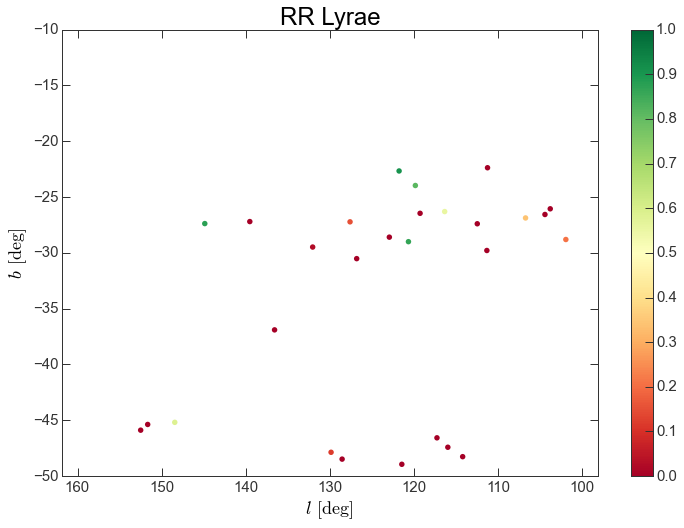

In [58]:
MAP = sampler.flatchain[sampler.flatlnprobability.argmax()]
pout = outlier_prob(MAP, rrlyr_d[:,0], rrlyr_d[:,3], rrlyr_vr_err)

plt.figure(figsize=figsize)
cl = plt.scatter(rrlyr_d[:,0], rrlyr_d[:,1], c=(1-pout), s=30, cmap='RdYlGn', vmin=0, vmax=1)
cbar = plt.colorbar(cl)
cbar.set_clim(0,1)

# plt.plot(d[ix,0], d[ix,2], linestyle='none', marker='o', ms=4)
plt.xlabel(r'$l\,[{\rm deg}]$')
plt.ylabel(r'$b\,[{\rm deg}]$')

plt.xlim(ls.max()+2,ls.min()-2)
plt.ylim(-50,-10)

plt.title("RR Lyrae")

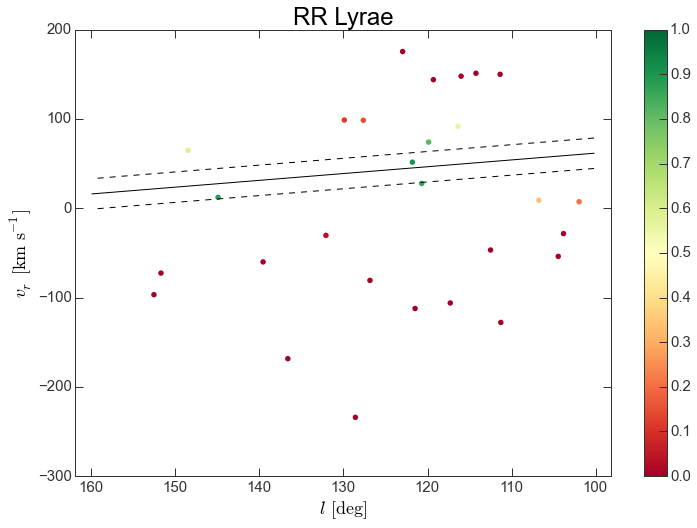

In [59]:
MAP = sampler.flatchain[sampler.flatlnprobability.argmax()]
pout = outlier_prob(MAP, rrlyr_d[:,0], rrlyr_d[:,3], rrlyr_vr_err)

plt.figure(figsize=figsize)
cl = plt.scatter(rrlyr_d[:,0], rrlyr_d[:,3], c=(1-pout), s=30, cmap='RdYlGn', vmin=0, vmax=1)
cbar = plt.colorbar(cl)
cbar.set_clim(0,1)

# plt.plot(d[ix,0], d[ix,2], linestyle='none', marker='o', ms=4)
plt.xlabel(r'$l\,[{\rm deg}]$')
plt.ylabel(r'$v_r\,[{\rm km\,s}^{-1}]$')

ls = np.linspace(d[ix,0].min(), d[ix,0].max(), 100)

best_m,best_b,best_V,best_f_ol = MAP
plt.plot(ls, best_m*ls + best_b, color='k', alpha=1, marker=None)
plt.plot(ls, best_m*ls + best_b + best_V, color='k', alpha=1, marker=None, linestyle='--')
plt.plot(ls, best_m*ls + best_b - best_V, color='k', alpha=1, marker=None, linestyle='--')
plt.xlim(ls.max()+2, ls.min()-2)

plt.title("RR Lyrae")